## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import math

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
feature_labels = list(data.columns[:-1])

In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Corelation of features

In [6]:
corr = data.corr()
print(corr)

                  x         y         z  ...  2*z+3*x*x         w    target
x          1.000000 -0.205926  0.812458  ...   0.996252  0.583277  0.728290
y         -0.205926  1.000000 -0.602663  ...  -0.261123 -0.401790 -0.690684
z          0.812458 -0.602663  1.000000  ...   0.847163  0.674486  0.969990
x*x        0.997947 -0.209289  0.807137  ...   0.997457  0.583803  0.719570
2*y       -0.205926  1.000000 -0.602663  ...  -0.261123 -0.401790 -0.690684
2*z+3*x*x  0.996252 -0.261123  0.847163  ...   1.000000  0.606860  0.764729
w          0.583277 -0.401790  0.674486  ...   0.606860  1.000000  0.641750
target     0.728290 -0.690684  0.969990  ...   0.764729  0.641750  1.000000

[8 rows x 8 columns]


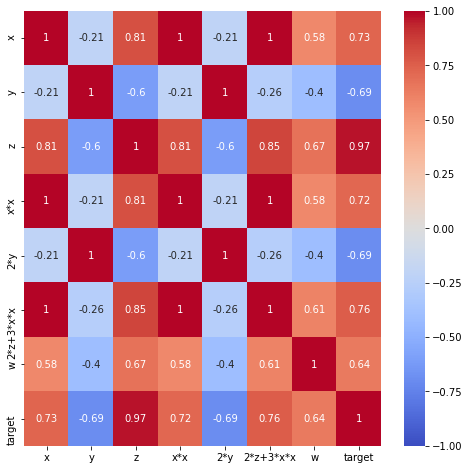

In [7]:
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(data.corr(),annot= True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', ax =ax)

# Task 1 : Logistic Regression

## Finding the best model for the given data

In [8]:
# alphas = list(np.logspace(1,4,num=10))
alphas = [0.0001,0.001,0.09,0.01,0.1,1,50,100,1000]
param = {"alpha" : alphas}

hyp = GridSearchCV(SGDClassifier(loss="log"), param_grid=param,cv=5)
hyp.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.09, 0.01, 0.1, 1, 50, 100,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [9]:
print("Best value of alpha: " ,hyp.best_params_)

Best value of alpha:  {'alpha': 0.001}


In [10]:
best_model = SGDClassifier(loss = "log",alpha = 0.001)

##  Getting the weights with the original data

In [11]:
best_model.fit(X_train,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
# best_model_accuracy = accuracy_score(Y,best_model.predict(X))
# best_model_coef_ = best_model.coef_[0]
best_model_accuracy = accuracy_score(y_test,best_model.predict(X_test))

In [13]:
print("Model Weights :",best_model.coef_[0])
best_model_weights = best_model.coef_[0]

Model Weights : [ 2.06224354 -1.83122882  4.06319327  1.74237383 -1.83122882  2.05871072
  0.74369364]


## Modifying original data

In [14]:
print(np.random.rand(1)/100)

[0.00121151]


In [15]:
# X_d = [x+ (np.random.rand(1)/100) for]
X_mod = np.zeros_like(X_train)
for i in range(len(X_train)):
  for j in range(len(X_train[0])):
    X_mod[i][j] =  X_train[i][j] + (np.random.rand(1))

In [16]:
best_model.fit(X_mod,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
best_model_edited_accuracy = accuracy_score(y_test,best_model.predict(X_test))

In [18]:
print("Model Weights :",best_model.coef_[0])
best_model_edited_weights= best_model.coef_[0]

Model Weights : [ 2.24095847 -3.2652303   4.86136624  1.42795158 -2.5661595   2.37436443
  0.13434754]


## Compare weights

In [19]:
# Difference in accuracy
print("Difference in accuracy : ",best_model_accuracy - best_model_edited_accuracy)

Difference in accuracy :  0.0


In [20]:
# absolute change in weights
print("Change in weights: ",np.abs(best_model_weights-best_model_edited_weights))

Change in weights:  [0.17871493 1.43400148 0.79817297 0.31442225 0.73493068 0.31565371
 0.6093461 ]


In [21]:
# top 4 features which have higher % change in weights 
print(best_model_weights)
print(best_model_edited_weights)

[ 2.06224354 -1.83122882  4.06319327  1.74237383 -1.83122882  2.05871072
  0.74369364]
[ 2.24095847 -3.2652303   4.86136624  1.42795158 -2.5661595   2.37436443
  0.13434754]


In [22]:
# calculate percent change
percent_change = [ (np.abs(a-b)/np.abs(a))*100  for a,b in zip(best_model_weights,best_model_edited_weights)]
percent_sort = np.argsort(percent_change)
top_4 = percent_sort[::-1][:4]

In [23]:
print("The top 4 features which had highest % change:")
for idx in top_4:
  print("%s with %.3f%% change"%(feature_labels[idx],percent_change[idx]))

The top 4 features which had highest % change:
w with 81.935% change
y with 78.308% change
2*y with 40.133% change
z with 19.644% change


# Task 2 : Linear SVM

In [24]:
# alphas = list(np.logspace(1,4,num=10))
alphas = [0.0001,0.001,0.09,0.01,0.1,1,50,100,1000]
param = {"alpha" : alphas}

hyp_svm = GridSearchCV(SGDClassifier(loss="hinge"), param_grid=param,cv=5)
hyp_svm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.09, 0.01, 0.1, 1, 50, 100,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [25]:
print("Best value of alpha: " ,hyp_svm.best_params_)

Best value of alpha:  {'alpha': 0.09}


In [26]:
best_model_svm = SGDClassifier(loss = "hinge",alpha = 0.001)

##  Getting the weights with the original data

In [27]:
best_model_svm.fit(X_train,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
# best_model_accuracy = accuracy_score(Y,best_model.predict(X))
# best_model_coef_ = best_model.coef_[0]
best_model_accuracy_svm = accuracy_score(y_test,best_model.predict(X_test))

In [29]:
print("Model Weights :",best_model_svm.coef_[0])
best_model_weights_svm = best_model_svm.coef_[0]

Model Weights : [ 3.7080206  -3.89749944  6.05389537  3.64225674 -3.89749944  4.0089647
  0.13523995]


## Modifying original data

In [30]:
# X_d = [x+ (np.random.rand(1)/100) for]
X_mod = np.zeros_like(X_train)
for i in range(len(X_train)):
  for j in range(len(X_train[0])):
    X_mod[i][j] =  X_train[i][j] + (np.random.rand(1))

In [31]:
best_model_svm.fit(X_mod,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
best_model_edited_accuracy_svm = accuracy_score(y_test,best_model_svm.predict(X_test))

In [33]:
print("Model Weights :",best_model_svm.coef_[0])
best_model_edited_weights_svm= best_model_svm.coef_[0]

Model Weights : [ 2.78976581 -2.03102938  4.53088393  3.07773338 -4.32140672  3.39711635
  3.06039283]


## Compare weights

In [34]:
# Difference in accuracy
print("Difference in accuracy : ",best_model_accuracy - best_model_edited_accuracy)

Difference in accuracy :  0.0


In [35]:
# absolute change in weights
print("Change in weights: ",np.abs(best_model_weights_svm-best_model_edited_weights))

Change in weights:  [1.46706213e+00 6.32269146e-01 1.19252913e+00 2.21430516e+00
 1.33133994e+00 1.63460027e+00 8.92413656e-04]


In [36]:
# top 4 features which have higher % change in weights 
print(best_model_weights_svm)
print(best_model_edited_weights_svm)

[ 3.7080206  -3.89749944  6.05389537  3.64225674 -3.89749944  4.0089647
  0.13523995]
[ 2.78976581 -2.03102938  4.53088393  3.07773338 -4.32140672  3.39711635
  3.06039283]


In [37]:
# calculate percent change
percent_change_svm = [ (np.abs(a-b)/np.abs(a))*100  for a,b in zip(best_model_weights_svm,best_model_edited_weights_svm)]
percent_sort_svm = np.argsort(percent_change_svm)
top_4_svm = percent_sort_svm[::-1][:4]

In [38]:
print("The top 4 features which had highest % change:")
for idx in top_4_svm:
  print("%s with %.3f%% change"%(feature_labels[idx],percent_change_svm[idx]))

The top 4 features which had highest % change:
w with 2162.935% change
y with 47.889% change
z with 25.158% change
x with 24.764% change


# Observations

* We get the highest percentage deviation of weights for these features in case of SVM

| Feature | Percentage Change |
----------|-------------------|
w  | 91.322% 
z  | 63.757% 
x*x | 57.470% 
y  |28.886% 

* We get the highest percentage deviation of weights for these features in case of Logistic Regression

| Feature | Percentage Change |
----------|-------------------|
w | 66.564% |
y | 45.096% |
z | 29.705% |
2*y | 27.908% |


- In both cases feature 'w' had highest percentage deviation, which is a result of presence of multicolinearity
- If incase we would have picked 'w' as the most important or least important feature during training and ignored the presence of colinearity, then even if our dataset changed a little our previous obsercation about 'w' would be totally wrong as it can change by 91% in case of SVM as we observed in our experiment. 

* In both the algorithms, we can say that the weight values change drastically even when a small change appears in the dataset which confirms that the data contains colinearity and hence we cant use the weights obtained for getting the feature importances.